<a href="https://colab.research.google.com/github/Akhila-Gururaj/Akhila-Gururaj/blob/main/Business_Case_Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
df = pd.read_csv(data_path)
df



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Defining Problem Statement and Analysing basic metrics (10 Points)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

v

In [3]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 180
Number of columns: 9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [7]:
shape = df.shape
print("Shape = {}".format(shape))

Shape = (180, 9)


**Observations**:


*  There are no missing values in the data.
*  There are 3 unique products in the dataset.
*  KP281 is the most frequent product.
*  Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of
   persons have age less than or equal to 33.  
*   Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.

Out of 180 data points, 104's gender is Male and rest are the female.




Non-Graphical Analysis: Value counts and unique attributes

In [8]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [9]:
df.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Length: 1

Visual Analysis - Univariate & Bivariate (30 Points)
For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
For categorical variable(s): Boxplot (10 Points)
For correlation: Heatmaps, Pairplots(10 Points)

In [10]:
print(df.head())

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


<ipython-input-26-58593eb4d9cc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], kde = False, color ='red', bins = 30)


<Axes: xlabel='Income'>

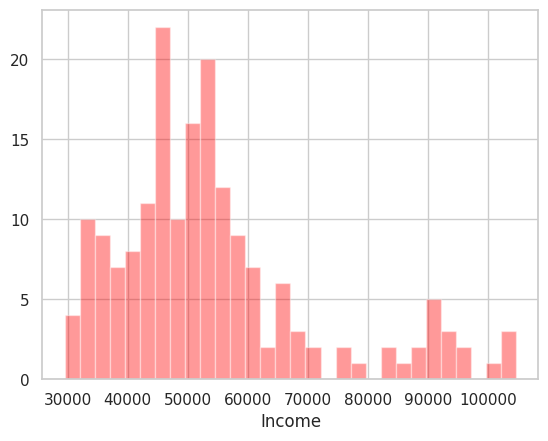

In [26]:
#displot#
sns.set(style='dark',)
sns.set_style('whitegrid')
sns.distplot(df['Income'], kde = False, color ='red', bins = 30)


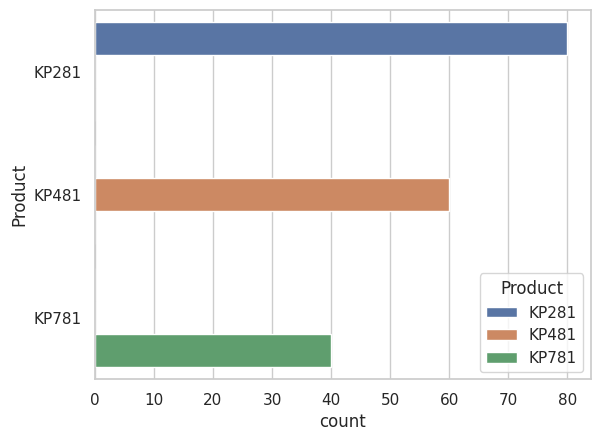

In [31]:
#COUNT Plot
df.head()
sns.countplot(y="Product", hue="Product",data=df)
plt.show()

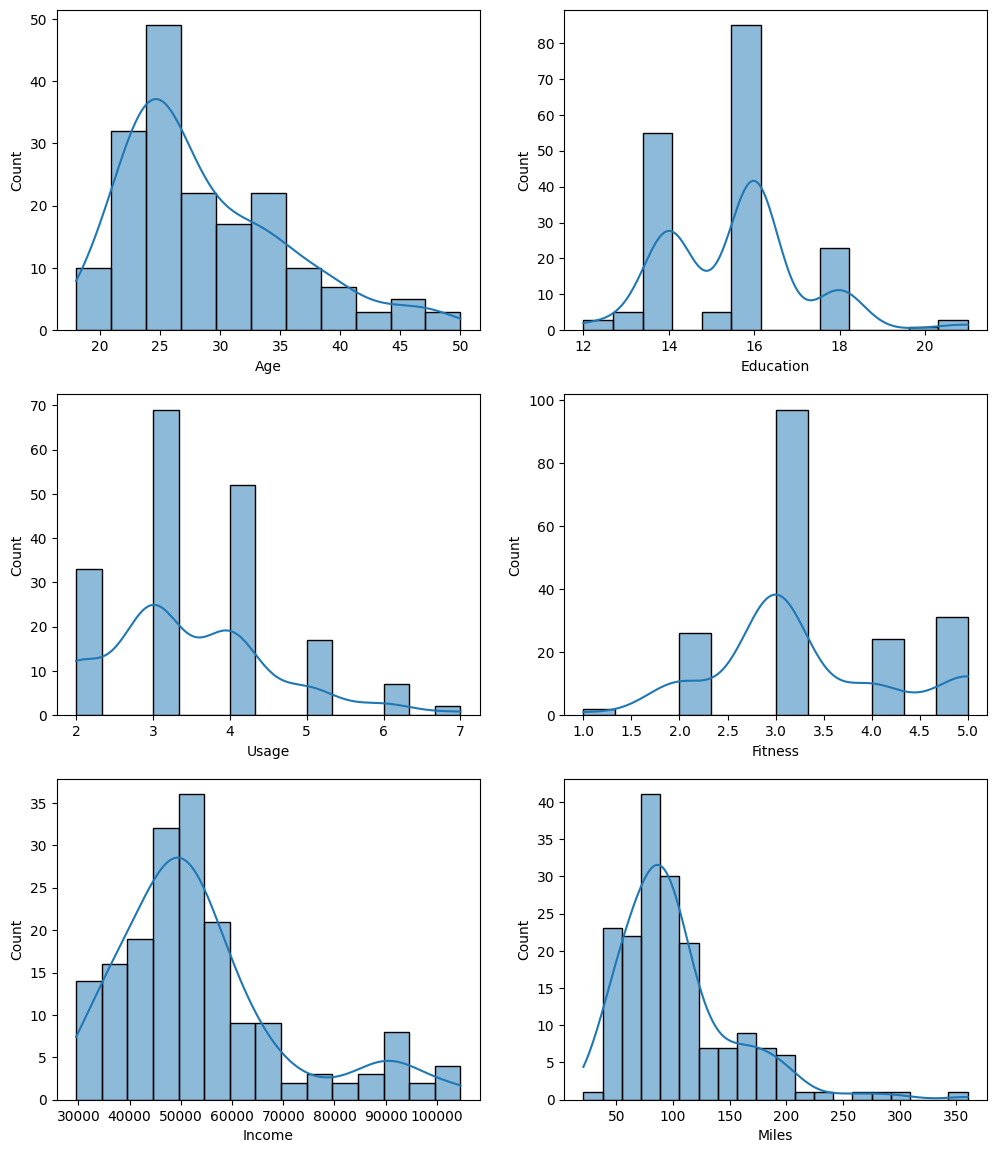

In [14]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()


Outliers detection using BoxPlots

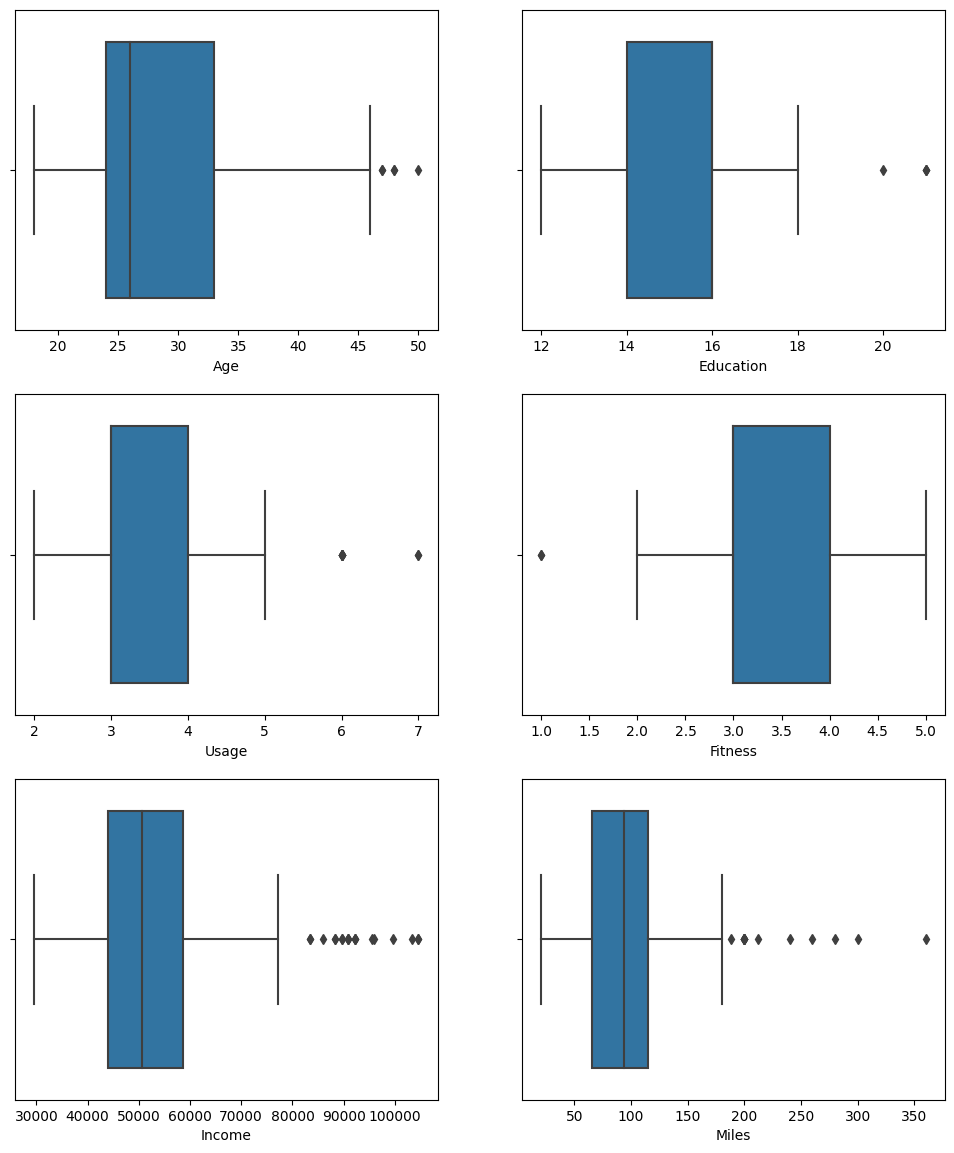

In [15]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

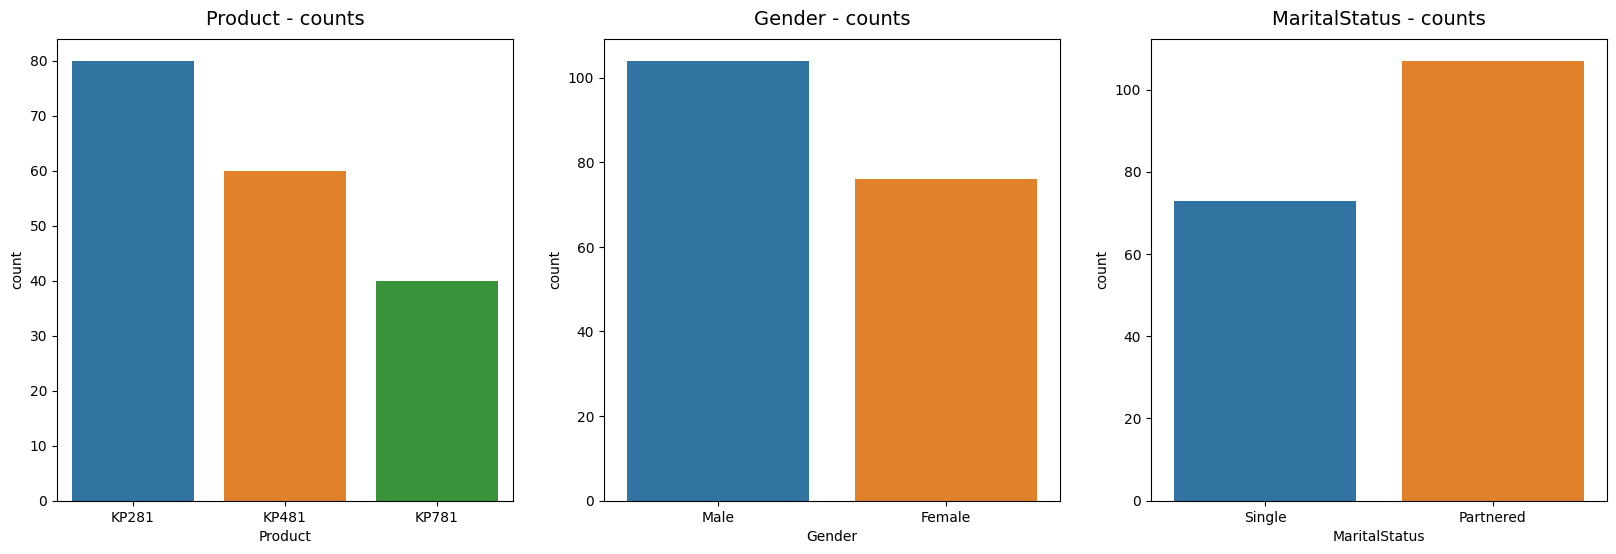

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

**Visual Analysis - Univariate**

*   Most customers are between teenage and mid 20s people.
*   KP281 is most sold product with 44.45% in overall.
*   Almost 60% of customers are partnered.
*   Most customers earning between 30k and 60k.
*   Most customers running 50 to 120kms per week

**Obervations**
KP281 is the most frequent product.
Thare are more Males in the data than Females.
More Partnered persons are there in the data.

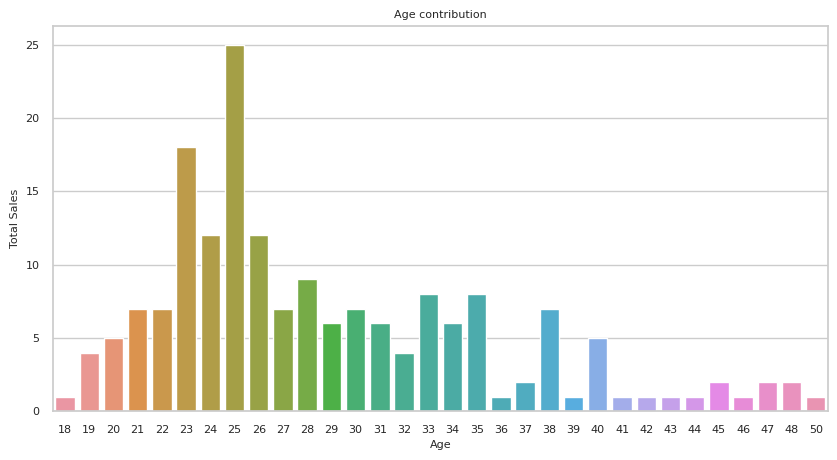

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Age')
plt.ylabel('Total Sales', fontsize=8); plt.title('Age contribution', fontsize=8); plt.xlabel("Age", fontsize=8)
plt.xticks(fontsize=8); plt.yticks(fontsize=8); plt.show()

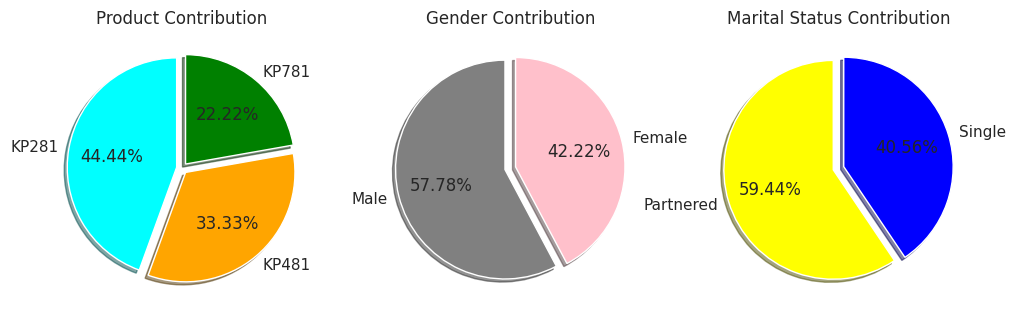

In [47]:
fig= plt.figure(figsize=(12,5))
a1 = fig.add_subplot(131)
a1.pie(x=df['Product'].value_counts(),
        startangle=90, shadow=True, explode=[0.05,0.05,0.05],
        autopct='%1.2f%%', colors=['cyan','orange','green'], labels=df['Product'].value_counts().index)
a1.set_title('Product Contribution')
a2= fig.add_subplot(132)
a2.pie(x=df['Gender'].value_counts(),
        startangle=90, shadow=True, explode=[0.05,0.05],
        autopct='%1.2f%%', colors=['Grey','Pink'], labels=df['Gender'].value_counts().index)
a2.set_title('Gender Contribution')
a2= fig.add_subplot(133)
a2.pie(x=df['MaritalStatus'].value_counts(),
        startangle=90, shadow=True, explode=[0.05,0.05],
        autopct='%1.2f%%', colors=['yellow','blue'], labels=df['MaritalStatus'].value_counts().index)
a2.set_title('Marital Status Contribution')
plt.show()

Text(0.5, 12.44444444444443, 'Education')

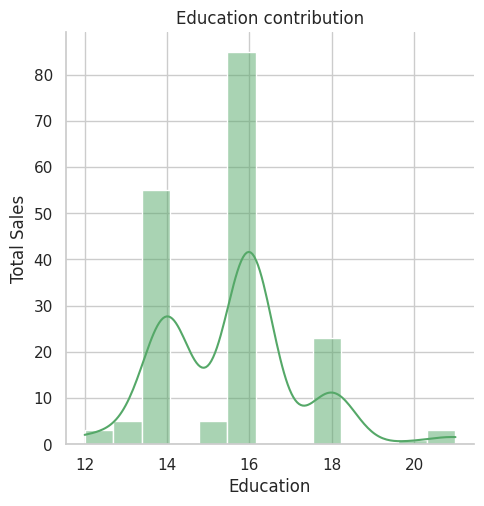

In [48]:
sns.displot(x=df['Education'], kde=True, color='g')
plt.ylabel('Total Sales'); plt.title('Education contribution'); plt.xlabel("Education")


Each products customer preference based on customers data

*   KP281 & KP481 products are bought by 30k to 70k earning customers.
*   KP781 product bought by customers who earning more than 50k.
*   KP281 & KP481 product customers mostly used to run 50 to 120 miles per week, but KP781 product used to run more than 100 miles per week
*   Beginner and Intermediate fitness people prefer KP281 and KP481.
Advance Fitness people prefer KP781

In [49]:
p1 = df[df['Product']=='KP281']
p2 = df[df['Product']=='KP481']
p3 = df[df['Product']=='KP781']

Text(0.5, 1.0, 'KP781 Customers Annual Income')

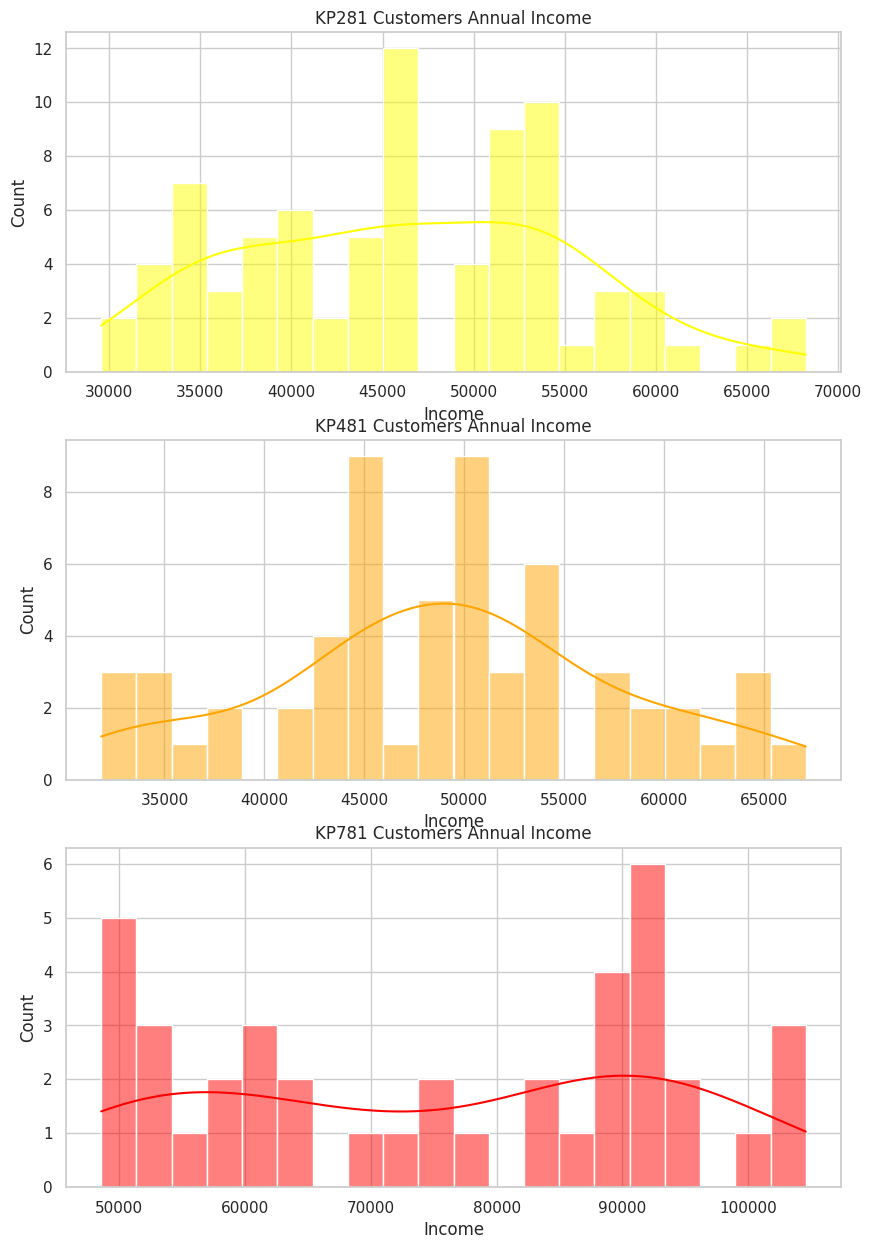

In [50]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))
sns.histplot(p1['Income'], kde=True, bins=20, ax=ax[0], color='yellow'); ax[0].set_title("KP281 Customers Annual Income")
sns.histplot(p2['Income'], kde=True, bins=20, ax=ax[1], color='orange'); ax[1].set_title("KP481 Customers Annual Income")
sns.histplot(p3['Income'], kde=True, bins=20, ax=ax[2], color='red'); ax[2].set_title("KP781 Customers Annual Income")

In [17]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

**Obervations**
**Product**
44.44% of the customers have purchased KP2821 product.
33.33% of the customers have purchased KP481 product.
22.22% of the customers have purchased KP781 product.
**Gender**
57.78% of the customers are Male.
**MaritalStatus**
59.44% of the customers are Partnered.

**Bivariate Analysis**
Checking if features - Gender or MaritalStatus have any effect on the product purchased

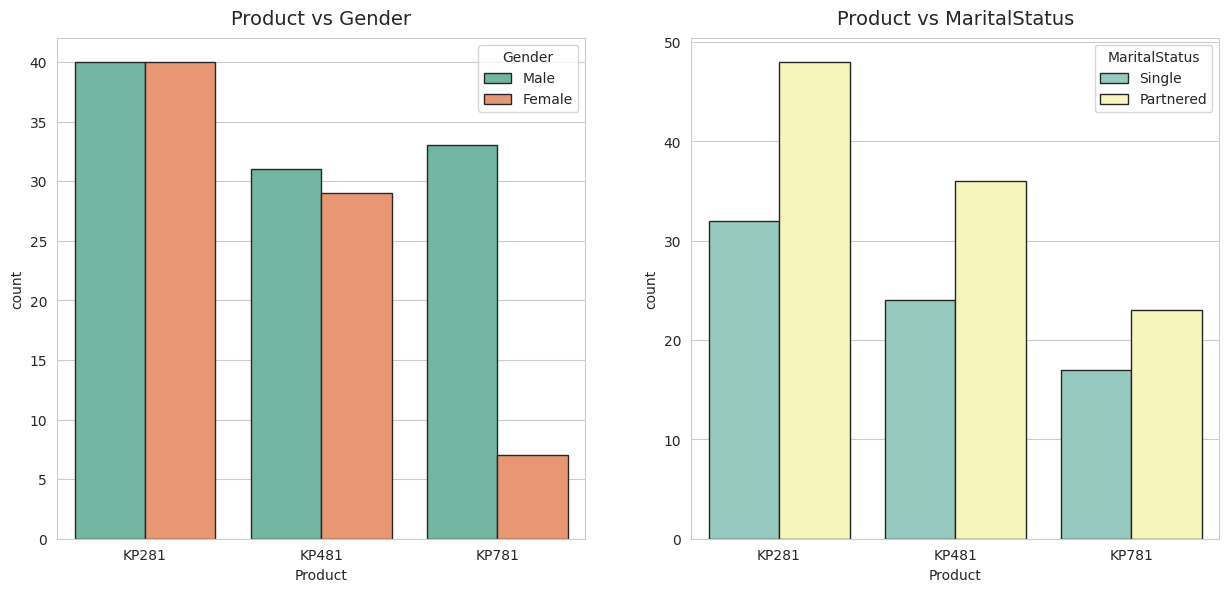

In [18]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

**Obervations**
Product vs Gender
Equal number of males and females have purchased KP281 product and Almost same for the product KP481
Most of the Male customers have purchased the KP781 product.
Product vs MaritalStatus
Customer who is Partnered, is more likely to purchase the product.

Bivariate Analysis Checking if features - **Gender** or **Age** have any effect on the product purchased

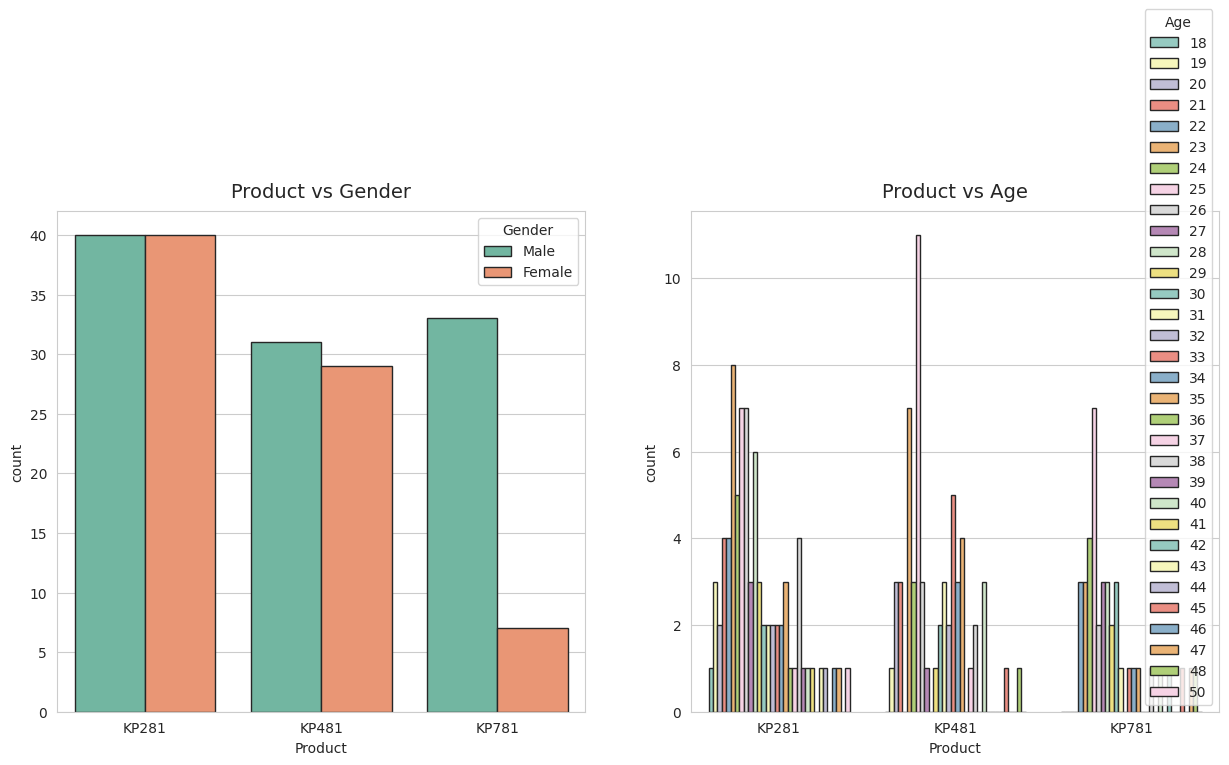

In [19]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='Age', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs Age", pad=10, fontsize=14)
plt.show()

Obervations
Product vs Gender
Equal number of males and females have purchased KP281 product and Almost same for the product KP481
Most of the Male customers have purchased the KP781 product.
Product vs Age
Customer who is mid aged , is more likely to purchase the product.

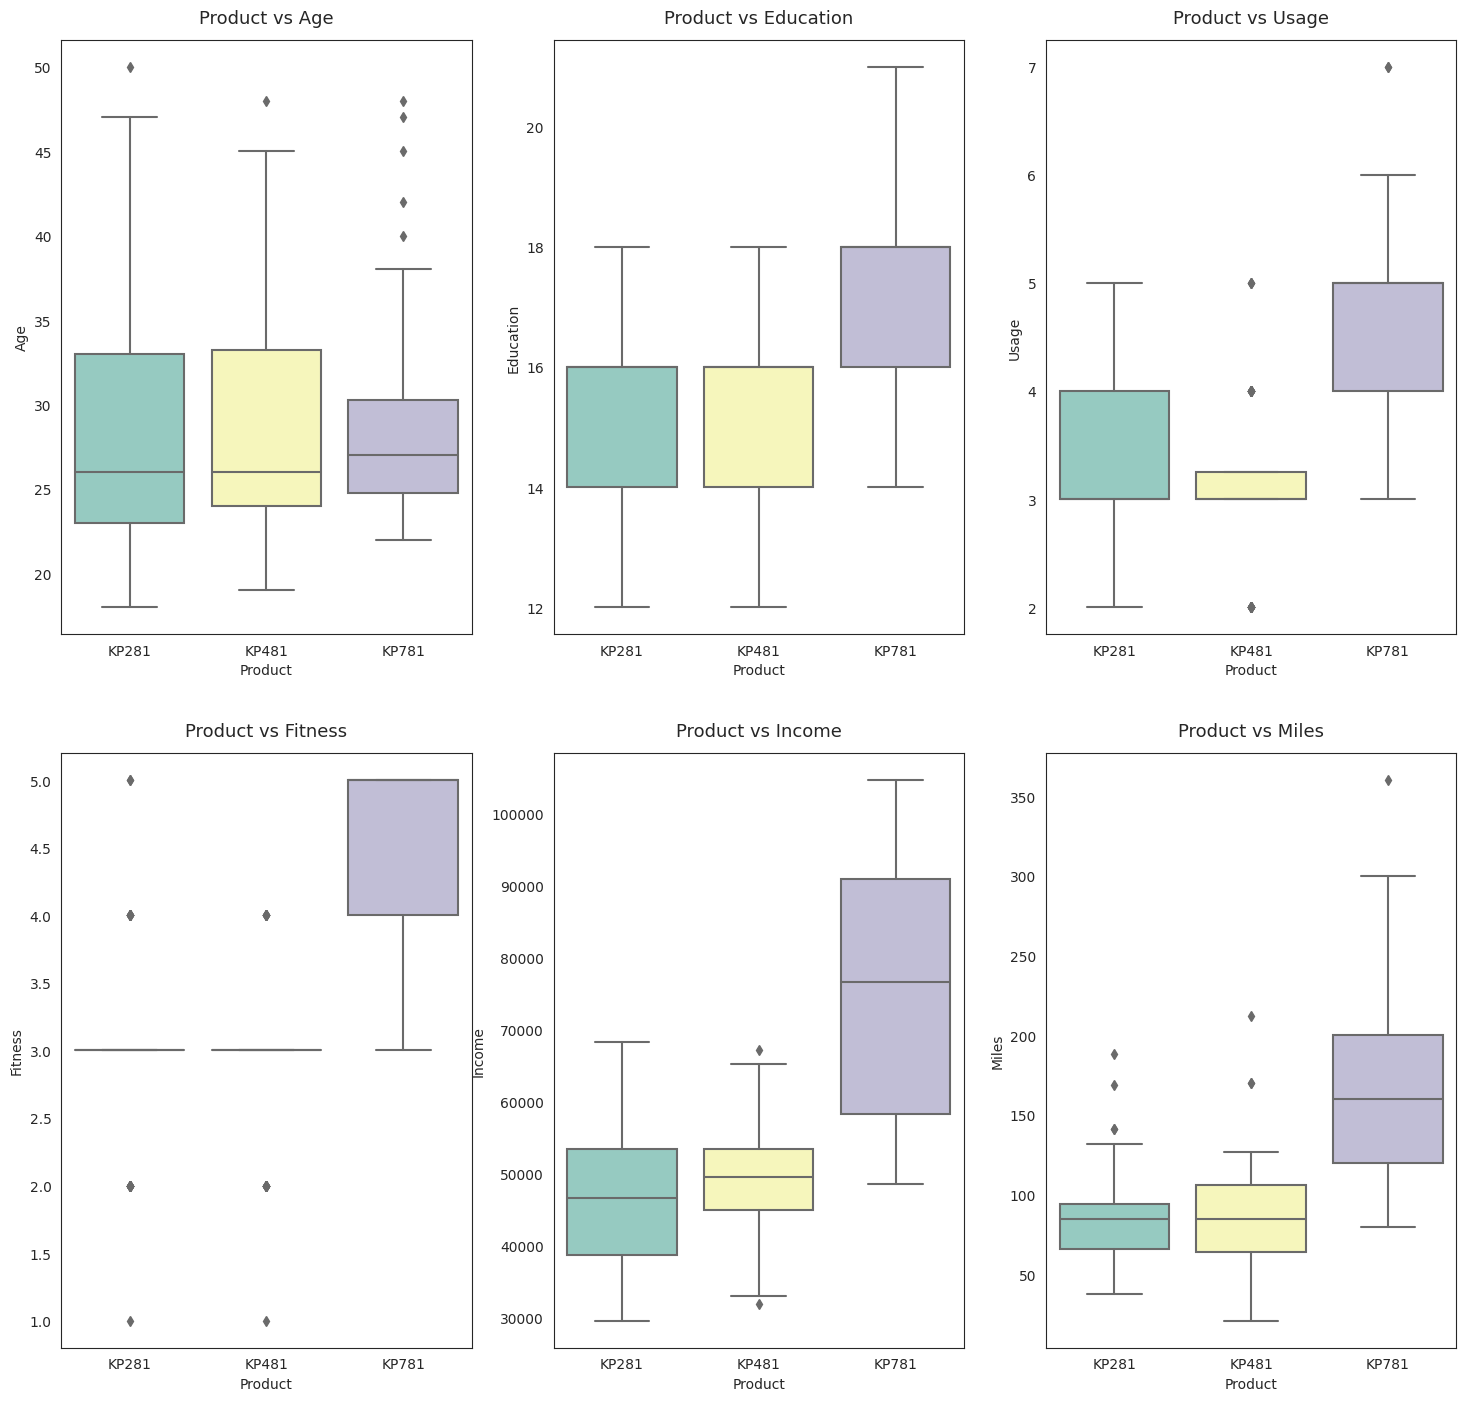

In [20]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

For correlation:** Heatmaps, Pairplots**

In [40]:
sns.heatmap(df)

ValueError: ignored

Missing values & Outlier Detection

1.   Income and Miles have more outliers than other attributes.
2.   75% of customers age less than 33.
3.   75% of customers earning less than 60k.
4.   75% of customers are fitness people more than 3.

In [41]:
#Dataset haven't any null values

df.isna().sum(axis=0)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [42]:
df.describe().loc[['mean','50%']]

,Age,Education,Usage,Fitness,Income,Miles
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000



**Visual Analysis - Correlation**
*   If usage is more than 150 miles per km, mostly preferred KP781.
*   Fitness level greater than 3 and usage more than 4days per week, are prefers
*   High salaried customers prefer KP781

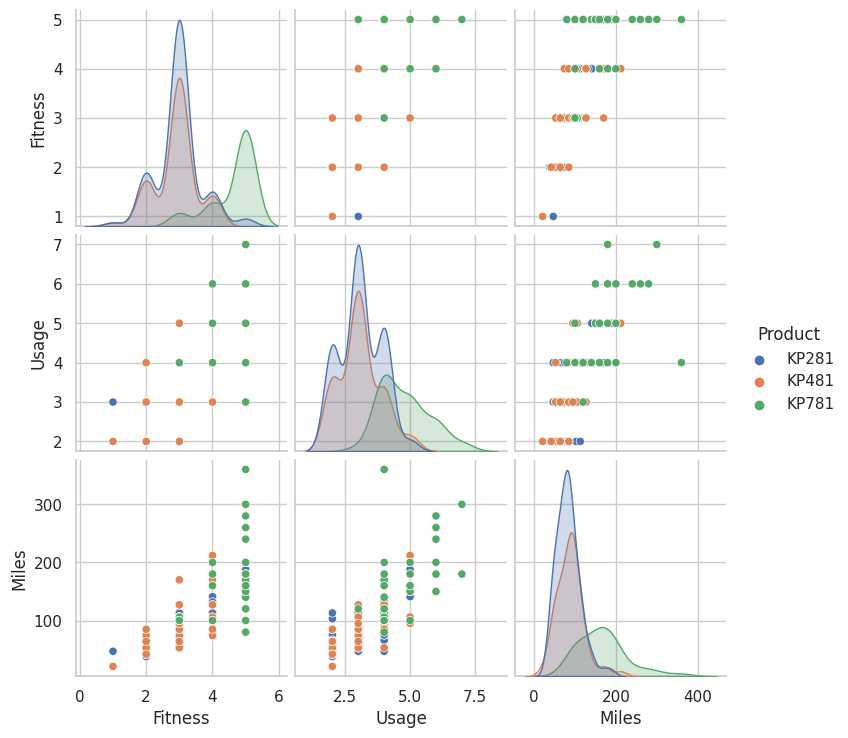

In [51]:
sns.pairplot(data=df[['Fitness','Usage','Miles','Product']], hue='Product')

<Axes: >

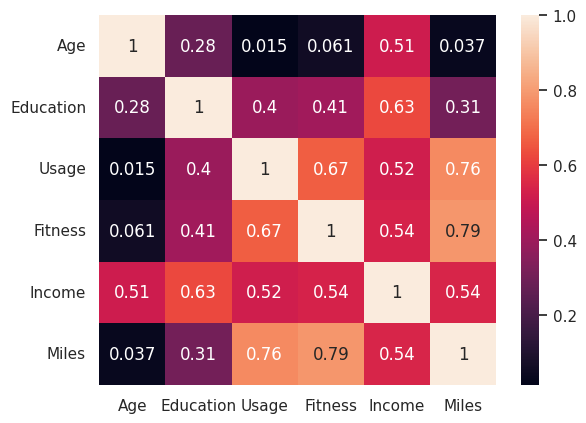

In [52]:
sns.heatmap(df[['Age','Education','Usage','Fitness','Income','Miles']].corr(), annot=True)

Probability- marginal, conditional probability.

In [53]:
df.describe().loc[['mean','50%']]

,Age,Education,Usage,Fitness,Income,Miles
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000


In [54]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

In [55]:
#Marginal Probability
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [62]:
#Conditional Probabilities

#Probability of each product given gender
def p_prod_given_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."

    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')



P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



In [63]:
#Probability of each product given MaritalStatus

def p_prod_given_mstatus(status, print_marginal=False):
    if status != "Single" and status != "Partnered":
        return "Invalid marital status value."

    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()

    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")

p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



Business Insights:
1. **57.78%** Customers are **Male**.
2. **59.44%** Customers are **Partnered**.
3. Most sold product KP281, its 44.44% of sales out of overall Aerofit Treadmill sale.
4. KP281, KP481 products have almost similar customer’s profile, except Male Partnered prefer KP481 & Female Partnered prefer KP281.
5. KP781 product is most preferred by Males, it’s almost 6 times compared to Females.
6. 75% of customers are earning less than 60k, and customers who earning more than 60k prefer KP781.
7. KP781 had unique among other treadmills when it comes more usage or high fitness customer.
8. Probability of Buying KP281 increased from 44.44% to 58.7%, if customer is Female and Partnered.
9. Probability of Buying KP781 increased from 22.22% to 32.56%, if customer is Male and Single.
10. Probability of Buying KP781 decreased from 22.22% to 8.7%, if customer is Female and Partnered

Recommendation:
1. As KP781 premium product preferred by Males, more usage and high salaried people, we can promote this product with similar characteristics and also we can promote upcoming premium products to them.
2. KP281 & KP481 products preferred by almost similar Characteristics and KP281 is most sold product, we can promote KP481 products more and can make some no cost EMI support.
3. Provide personalized Ads in E-commerce sites and in Social Media for better reach to similar characteristics of people with respective preferred products.